In [82]:
import openmc
import openmc.mgxs
import matplotlib.pyplot as plt
import time
import numpy as np

In [79]:
#create material, #define fuel,clad,moderator etc
#geometry by making surface, then cells, then universe then geometry
#setting files with source, particles, etc
#creates tallies, or mgxs
time1 = time.time()

In [18]:
fuel = openmc.Material(1,'uo2')
fuel.add_nuclide('U235',0.1)
fuel.add_nuclide('U238',0.9)
fuel.add_nuclide('O16',2)
fuel.set_density('g/cm3',10.97)
mats = openmc.Materials([fuel])
mats.export_to_xml()

/home/hasnain123/anaconda3/envs/openmc/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=1.
  warn(msg, IDWarning)


In [19]:
#surface
a = 70
left = openmc.XPlane(x0=-a,boundary_type='vacuum')
right = openmc.XPlane(x0=a,boundary_type='vacuum')
front = openmc.YPlane(y0=-a,boundary_type='vacuum')
back = openmc.YPlane(y0=a,boundary_type='vacuum')
top = openmc.ZPlane(z0=a,boundary_type='vacuum')
bottom = openmc.ZPlane(z0=-a,boundary_type='vacuum')

In [20]:
#cell
slab_cell = openmc.Cell()
slab_cell.region = +left & -right & +bottom & -top #& +front & -back 
slab_cell.fill = fuel

In [21]:
#univers
universe = openmc.Universe(cells=[slab_cell])
#geometry
slab_geometry = openmc.Geometry()
slab_geometry.root_universe = universe
slab_geometry.export_to_xml()

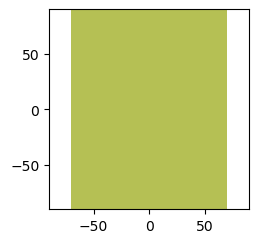

In [22]:
universe.plot(width=(180,180))

In [73]:
batches = 250
particles = 1000000
inactive = 100
settings = openmc.Settings()
settings.particles = particles
settings.batches = batches
settings.inactive = inactive
#settings.energy_mode = 'multi-group'
bounds = [-a,-a,-a,a,a,a]
uniform_dist = openmc.stats.Box(
    lower_left = bounds[:3],
    upper_right=bounds[3:],
    only_fissionable=True
)
settings.source = openmc.Source(space=uniform_dist)
settings.export_to_xml()

In [24]:
energy_filter = openmc.EnergyFilter([0,1000,20e6])
#energy_filter = openmc.EnergyFilter([0,20e6])

In [25]:
mesh = openmc.RegularMesh()
mesh.dimension = 140,1,1
mesh.lower_left = bounds[:3]
mesh.upper_right = bounds[3:]

In [26]:
mesh_filter = openmc.MeshFilter(mesh=mesh)

In [27]:
tallies_file = openmc.Tallies()
tally = openmc.Tally(name='flux')
tally.filters = [mesh_filter,energy_filter]
tally.scores = ['flux']
tallies_file.append(tally)
tallies_file.export_to_xml()

In [13]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [75]:
sp = openmc.StatePoint(f'statepoint.{batches}.h5')

In [33]:
flux_rate = sp.get_tally(scores=['flux'],filters=[energy_filter])

In [66]:
group_1 = flux_rate.mean[::2].reshape(-1)
group_2 = flux_rate.mean[1::2].reshape(-1)

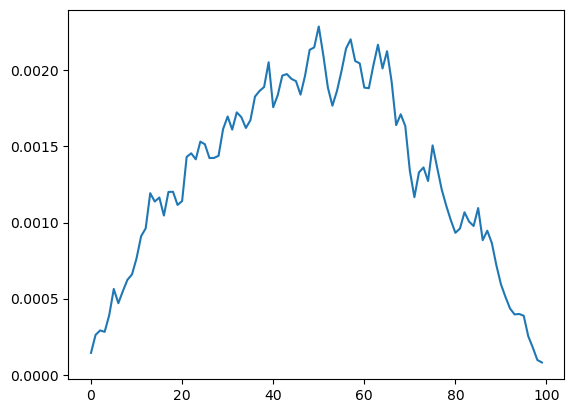

In [68]:
#plt.plot(group_2)
plt.plot(group_1)

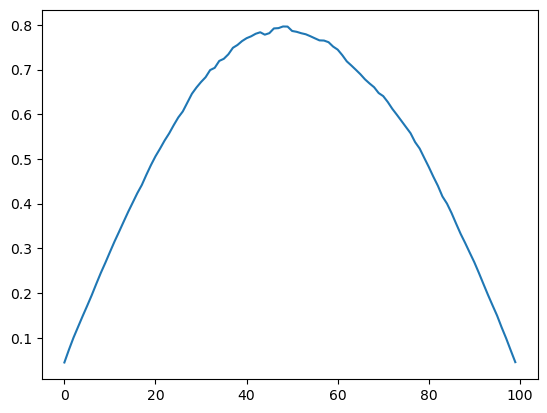

In [70]:
plt.plot(group_2)

In [84]:
print(np.array([group_1]))
print(np.array([group_2]))
time2 = time.time()
tot_time = time2 - time1 
print(f'time for simulation: {tot_time} secs')

[[1.43864533e-04 2.61804785e-04 2.91065857e-04 2.81884813e-04
  3.92184512e-04 5.63623608e-04 4.70007306e-04 5.50170336e-04
  6.24116943e-04 6.59229864e-04 7.65419438e-04 9.10666258e-04
  9.61580944e-04 1.19296613e-03 1.13811134e-03 1.16478971e-03
  1.04630531e-03 1.20114185e-03 1.20246113e-03 1.11594900e-03
  1.14153400e-03 1.43131597e-03 1.45518387e-03 1.41569349e-03
  1.53223524e-03 1.51454423e-03 1.42429279e-03 1.42464752e-03
  1.43895066e-03 1.61482005e-03 1.69706171e-03 1.61096628e-03
  1.72437030e-03 1.69322468e-03 1.62161216e-03 1.67279964e-03
  1.82787196e-03 1.86503165e-03 1.89092059e-03 2.05354895e-03
  1.75809850e-03 1.83790989e-03 1.96590705e-03 1.97609330e-03
  1.94447179e-03 1.92949598e-03 1.84083371e-03 1.96623230e-03
  2.13528012e-03 2.15115794e-03 2.28879046e-03 2.10039325e-03
  1.88816703e-03 1.76812376e-03 1.86484708e-03 1.99649628e-03
  2.14447361e-03 2.20424944e-03 2.06153364e-03 2.04628483e-03
  1.88709476e-03 1.88309038e-03 2.03406170e-03 2.16887762e-03
  2.0128